In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook
import stochoptim.stochprob.network_design.network_design_problem as ndp
import stochoptim.stochprob.network_design.network_design_solution as nds
import stochoptim.stochprob.network_design.network_design_uncertainty as ndu

### Generate Problem Parameters

In [22]:
n_origins = 2
n_destinations = 2
n_intermediates = 4
#------------
param = ndp.generate_random_parameters(n_origins, n_destinations, n_intermediates)
param

{'n_origins': 2,
 'n_destinations': 2,
 'n_intermediates': 4,
 'opening_cost': array([[ 3,  7,  3,  7,  4,  6, 10,  9],
        [ 9,  4,  6, 10,  4, 10,  7,  8],
        [ 9,  6,  8,  3,  8,  3, 10, 10],
        [ 7,  4,  7,  3,  9,  9,  7,  9],
        [ 4, 10,  7,  9, 10,  4,  3,  6],
        [ 9,  9,  5,  7,  5,  5, 10,  7],
        [10,  8,  4,  6,  4,  8,  5,  4],
        [ 4, 10,  8,  8, 10, 10,  7,  6]]),
 'shipping_cost': array([[   5,   10,    8,   10,    6,   10, 1000, 1000],
        [   5,   10,   10,    9,    5,    8, 1000, 1000],
        [   8,    5,    6,    9,    5,    8,    9,   10],
        [   6,    5,    5,    5,    8,    8,    5,   10],
        [   8,    8,    8,    9,    9,    5,   10,    9],
        [   7,    5,    8,   10,    9,    5,    6,   10],
        [   6,    8,    5,    7,    9,    7,   10,    6],
        [   9,    9,    7,    7,    9,    7,    5,    6]]),
 'capacity': array([[    33,     29,     26,     25,     24,     25, 100000, 100000],
        [    21

### Instantiate Problem

In [23]:
network_problem = ndp.NetworkDesign(param)
network_problem

Network Design Problem: (2 stages)
  - decision variables: [52, 224]
    - stage 0: 
      - y: 52 (b)
    - stage 1: 
      - z: 224 (c)
  - random variables: [0, 4]
    - stage 1: 
      - d: 4

Network: 
  8 nodes
  52 transportation arcs
  4 commodities

### Instantiate Problem Uncertainty

#### Lognormal Demand

In [24]:
n_scenarios = 10
distribution = 'lognormal'
mean = 1
std = 1
#------------------
network_uncertainty = ndu.Demands(n_scenarios=n_scenarios, 
                                  n_commodities=n_destinations*n_origins, 
                                  distribution=distribution,
                                  mean=mean, 
                                  std=std)
network_uncertainty

Commodity demand uncertainty: logN(1,1)-corr0 
  - scenarios: 10 
  - features: 4 
    - d: 4 

#### Uniform Demand

In [25]:
n_scenarios = 10
distribution = "uniform"
lb = 5
ub = 20
corr = 0.4
#-------------------
network_uncertainty = ndu.Demands(n_scenarios=n_scenarios,
                                  n_commodities=n_origins*n_destinations, 
                                  distribution=distribution,
                                  lb=lb, 
                                  ub=ub, 
                                  corr=corr)
network_uncertainty

Commodity demand uncertainty: U[5,20]-corr0.4 
  - scenarios: 10 
  - features: 4 
    - d: 4 

### Build scenario tree

In [26]:
# get only scenarios of index [1, 5]
scenario_tree = network_uncertainty.get_scenario_tree([1, 5])
scenario_tree

Node               W=1
  Node             W=0.5	scenario={'d': array([12,  8, 12, 16])}
  Node             W=0.5	scenario={'d': array([14, 18, 13, 14])}

In [27]:
# get all scenarios
scenario_tree = network_uncertainty.get_scenario_tree()
scenario_tree

Node               W=1
  Node             W=0.1	scenario={'d': array([11, 16, 17,  9])}
  Node             W=0.1	scenario={'d': array([12,  8, 12, 16])}
  Node             W=0.1	scenario={'d': array([14, 12, 13, 13])}
  Node             W=0.1	scenario={'d': array([7, 7, 9, 6])}
  Node             W=0.1	scenario={'d': array([ 9, 15, 11, 10])}
  Node             W=0.1	scenario={'d': array([14, 18, 13, 14])}
  Node             W=0.1	scenario={'d': array([15, 14, 19, 18])}
  Node             W=0.1	scenario={'d': array([ 5, 17, 11, 17])}
  Node             W=0.1	scenario={'d': array([17,  9, 20, 14])}
  Node             W=0.1	scenario={'d': array([ 5, 18,  5, 16])}

### Solve the problem on the scenario tree

In [28]:
network_solution = network_problem.solve(scenario_tree)
network_solution

Number of scenario trees: 1 (bushiness: [10.0]) 

Initialize model... Finished. (0.017 sec).
Initialize variables... Finished. (0.023 sec).
Add deterministic constraints at subroot #1... Finished. (0.054 sec).
Define objective function at subtree #1... Finished. (0.037 sec).

Solve scenario tree #1... 
  Precompute variables and parameters... Finished. (0.000 sec).
  Check parameters validity... Finished. (0.000 sec).
  Add random constraints at subtree #1... Finished. (0.119 sec).
  Solve problem at subtree #1... Finished. (0.272 sec).
  Fill scenario tree... Finished. (0.012 sec).
Finished. (0.407 sec).


obj=808.900, gap=0.637%, time=0.2 sec

### Plot optimal solution

<IPython.core.display.Javascript object>


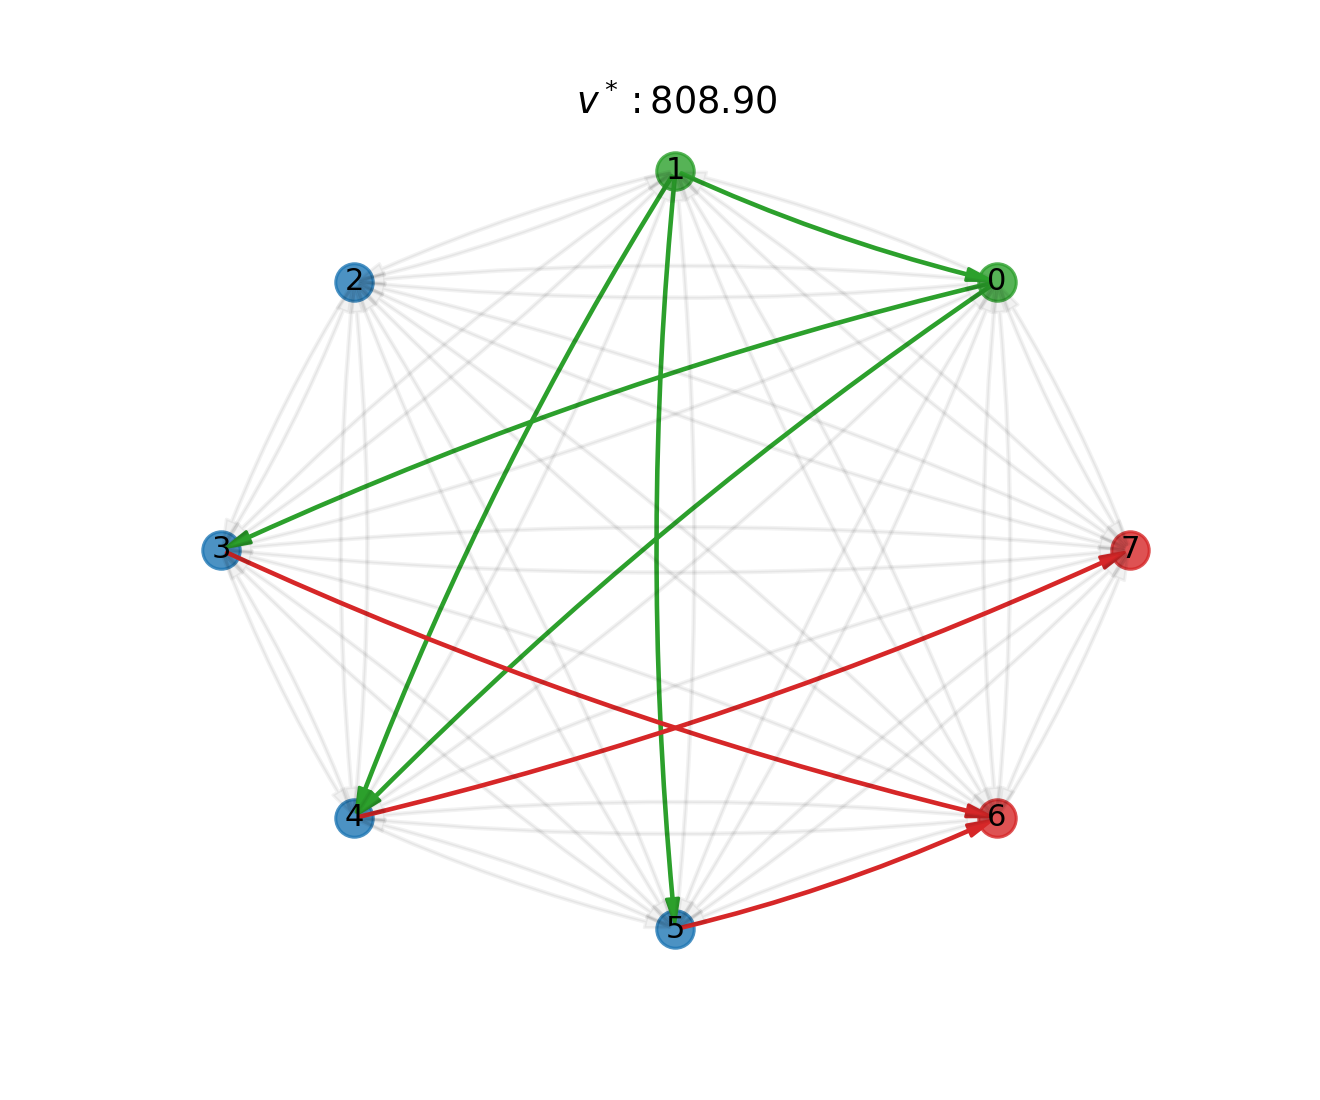

In [29]:
network_solution.plot_network()

<IPython.core.display.Javascript object>


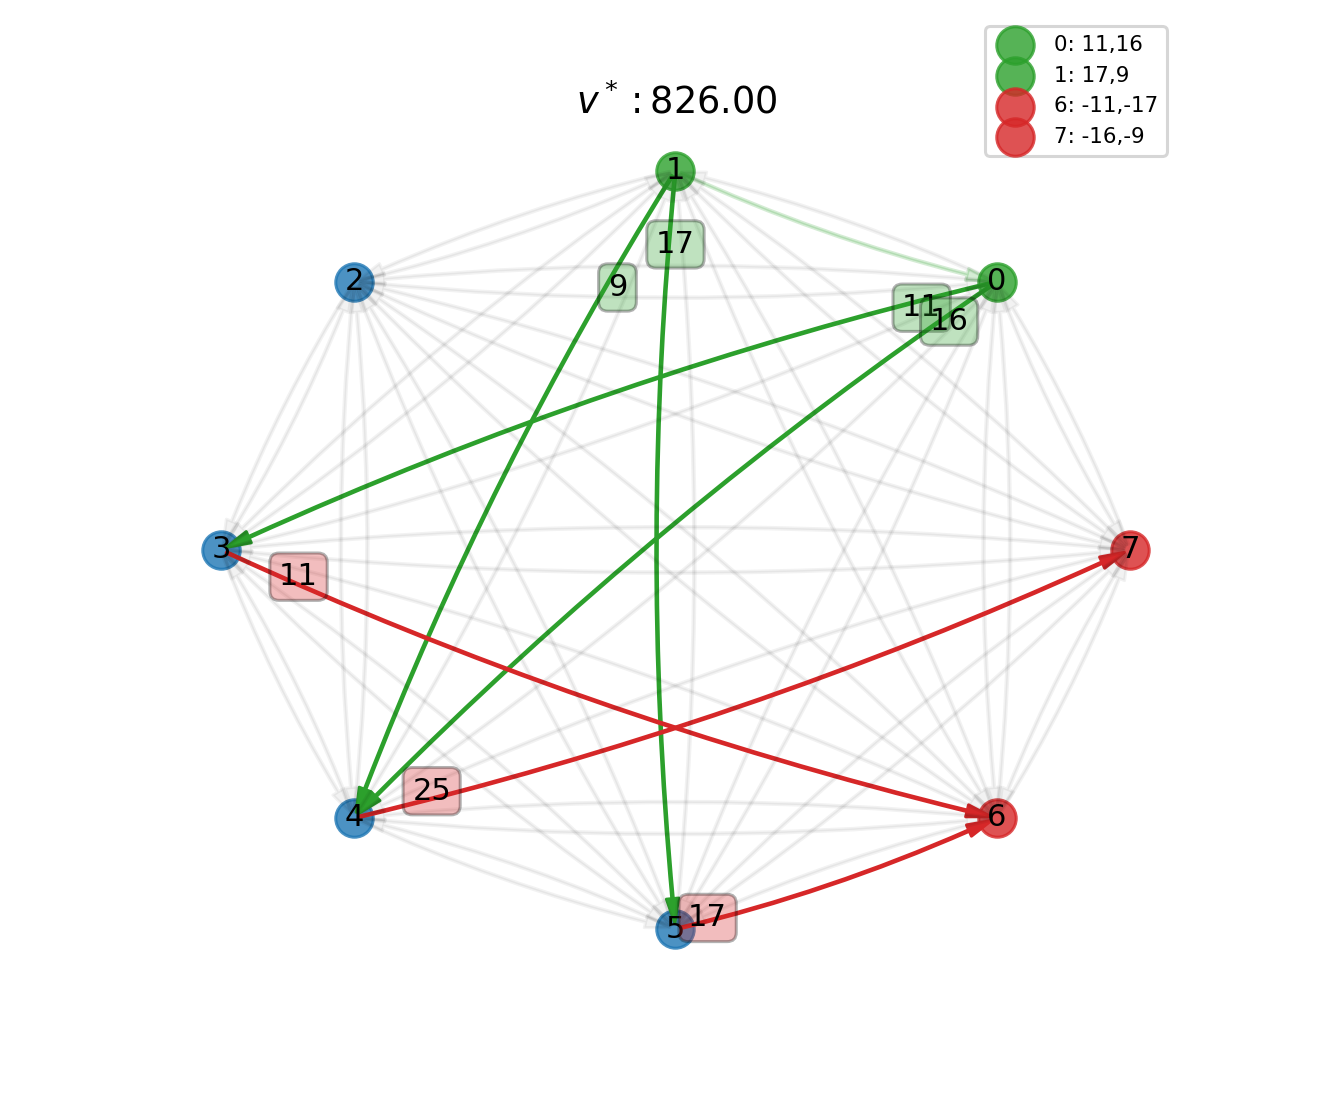

In [30]:
network_solution.plot_network(scen_index=0)